<a href="https://colab.research.google.com/github/IvanOM-97/DPro-Exercises/blob/master/U38T2C74ClusteringSeriesAssignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
AGRUPAMIENTO
  1. Sobre este Sprint
    Propósito del Sprint
    Comprender K-means a través de una implementación desde cero (scratch).
    Realizar un análisis de clústeres.
    Cómo aprender
    Después de implementar K-means desde cero, se utilizará para llevar a cabo un análisis de clústeres.

  2. K-means desde cero
    Se creará una clase de K-means desde cero. El algoritmo se implementará utilizando únicamente NumPy y otras librerías mínimas necesarias.
    A continuación, se proporciona una plantilla. Añade código a la clase ScratchKMeans.

    Conjunto de datos artificial para clustering
      Se proporciona un código para crear un conjunto de datos artificial con el fin de experimentar con clustering.

      La función make_blobs también genera las etiquetas correctas, pero en este caso no se usarán.
      Para dejar claro que no se utilizarán, se reciben con un guion bajo _ (underscore).

    《Dataset simple 3》

    Entrenamiento
      Se irán creando, paso a paso, los elementos necesarios para el entrenamiento de K-means.
'''


init 1, iter 1, sse: 610.3022393000717, Shift: 3.2106
init 1, iter 2, sse: 380.4048093649281, Shift: 2.0325
init 1, iter 3, sse: 296.84987603557056, Shift: 1.5024
init 1, iter 4, sse: 214.34717594519662, Shift: 2.2606
init 1, iter 5, sse: 134.95838630944516, Shift: 0.0000
init 2, iter 1, sse: 608.0614060026336, Shift: 5.6992
init 2, iter 2, sse: 135.20037835951985, Shift: 2.5500
init 2, iter 3, sse: 50.17648827322996, Shift: 0.3295
init 2, iter 4, sse: 48.63378320706403, Shift: 0.0000
init 3, iter 1, sse: 228.65426652261198, Shift: 3.6415
init 3, iter 2, sse: 48.97170661853691, Shift: 0.1589
init 3, iter 3, sse: 48.63378320706403, Shift: 0.0000
init 4, iter 1, sse: 275.7154746143301, Shift: 3.1557
init 4, iter 2, sse: 172.784046228494, Shift: 1.6714
init 4, iter 3, sse: 137.20385801884527, Shift: 0.4089
init 4, iter 4, sse: 135.2262142404039, Shift: 0.1493
init 4, iter 5, sse: 134.8543885370843, Shift: 0.0000
init 5, iter 1, sse: 746.01526753581, Shift: 4.7302
init 5, iter 2, sse: 266.

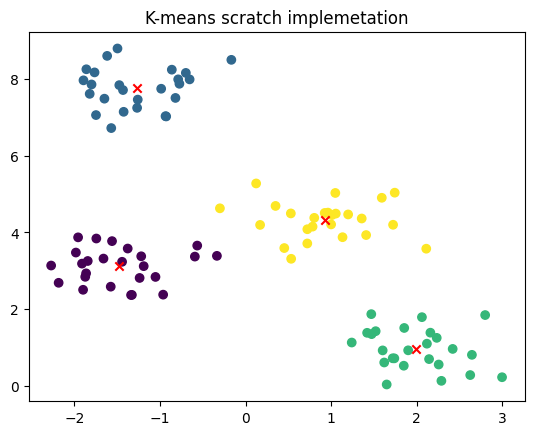

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Simple dataset 3 (ARTIFICIAL DATASET FOR CLUSTERING)
X, _ = make_blobs(n_samples=100,
                  n_features=2,
                  centers=4,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

#PROTOTIPO
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

    # PROBLEMA 1 - DETRMINAR EL VALOR INICNAL DEL PUNTO CENTRAL (CENTROIDE)
    def _init_centers(self, X):
        indices = np.random.choice(len(X), self.n_clusters, replace=False)
        return X[indices]

    # PROBLEMA 2 - CREAR UNA FUCNION PARA OBTENER EL SSE
    def _compute_sse(self, X, labels, centers):
        sse = 0
        for k in range(self.n_clusters):
            sse += np.sum((X[labels == k] - centers[k]) ** 2)
        return sse

    # PROBLMEA 3 - ASIGNACION A CLUSTERS
    def _assign_cluster(self, X, centers):
        labels = np.array([np.argmin([np.linalg.norm(x -c) for c in centers]) for x in X])
        return labels

    # PROBLEMA 4 - MOVIENDO EL PUNTO CENTRAL
    def _update_centers(self, X, labels):
        centers = np.array([X[labels == k].mean(axis=0) if len(X[labels == k]) > 0 else np.zeros(X.shape[1]) for k in range(self.n_clusters)])
        return centers

    # PROBLEMA 5 y 6 - REPETICION Y CALCULO CON DIFERENTES VALORES INICIALES
    def fit(self, X):
        '''
        Calculate clustering by k-means
          parameters
          -----------------------------
            X: the following forms of ndarray, shape(n_samples, n_features)
            Features of training data
        '''
        best_sse = np.inf
        best_centers = None
        best_labels = None

        for init_num in range(self.n_init):
            centers = self._init_centers(X)

            for i in range(self.max_iter):
                labels = self._assign_cluster(X, centers)
                new_centers = self._update_centers(X, labels)
                shift = np.sum(np.linalg.norm(centers - new_centers, axis = 1))

                if self.verbose:
                  print(f"init {init_num+1}, iter {i+1}, sse: {self._compute_sse(X, labels, centers)}, Shift: {shift:.4f}")

                if shift <= self.tol:
                  break

                centers = new_centers

            sse = self._compute_sse(X, labels, centers)
            if sse < best_sse:
                best_sse = sse
                best_centers = centers
                best_labels = labels

        self.centers = best_centers
        self.labels = best_labels
        self.sse_ = best_sse

    # PROBLEMA 7 - ESTIMACION
    def predict(self, X):
        """
        Calculate wich cluster the input data belongs to
        """
        return self._assign_cluster(X, self.centers)

# Running Scratch KMeans
kmeans = ScratchKMeans(n_clusters=4, n_init=5, max_iter=100, tol=1e-4, verbose=True)
kmeans.fit(X)
print("Final sse:", kmeans.sse_)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels)
plt.scatter(kmeans.centers[:, 0], kmeans.centers[:, 1], c='red', marker='x')
plt.title("K-means scratch implemetation")
plt.show()



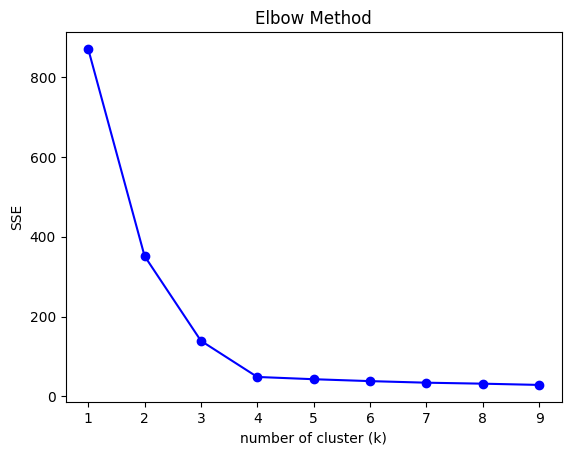

In [3]:
# PROBLEMA 8 - IMPLEMENTACION DEL METODO "ELBOW"
sse_list = []
k_range = range(1, 10)

for k in k_range:
  km = ScratchKMeans(n_clusters =k, n_init=5, max_iter=100, tol=1e-4)
  km.fit(X)
  sse_list.append(km.sse_)

plt.plot(k_range, sse_list, 'bo-')
plt.xlabel('number of cluster (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

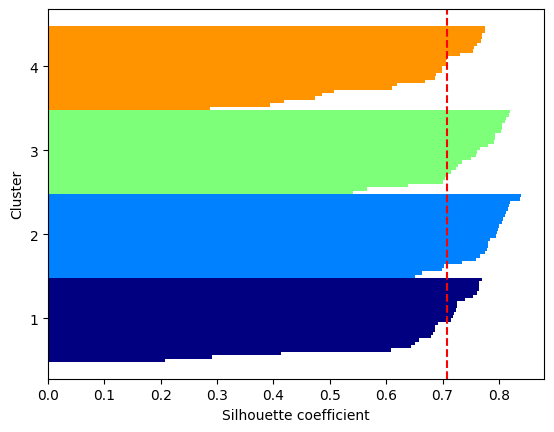

In [4]:
# PROBLEMA 9 - FIGURA DE SILUETA (para deternimar el numero de k)
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

km = KMeans(n_clusters= 4, random_state= 0)
y_km = km.fit_predict(X)
silhouette_vals = silhouette_samples(X, y_km)
silhouette_avg = silhouette_score(X, y_km)
cluster_labels = np.unique(y_km)
n_clusters = len(cluster_labels)

from matplotlib import cm

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor="none",
        color=color,
    )
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient")
plt.show()


In [ ]:
# analisis de datos de wholesaler
# reduccion de la dimension (con PCA)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca = pca.fit(data)
data_pca = pca.transform(data)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components = None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1, 7), var_exp, alpha = 0.5, align = 'center', label = 'individual explained variance')
plt.step(range(1, 7), cum_var_exp, where = 'mid', label = 'cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6, "blue", linestyles = 'dashed')
plt.legend(loc = 'best')
plt.grid()
plt.show()

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

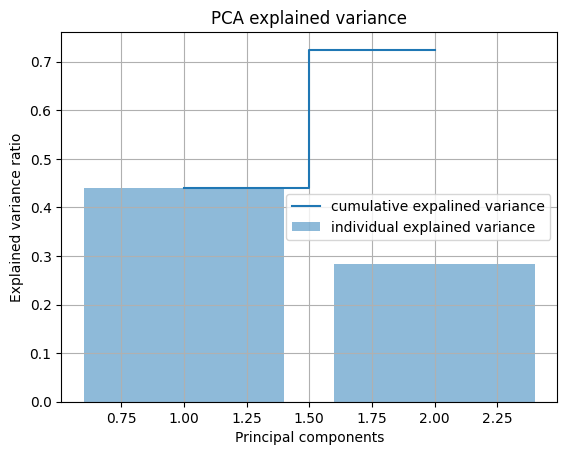

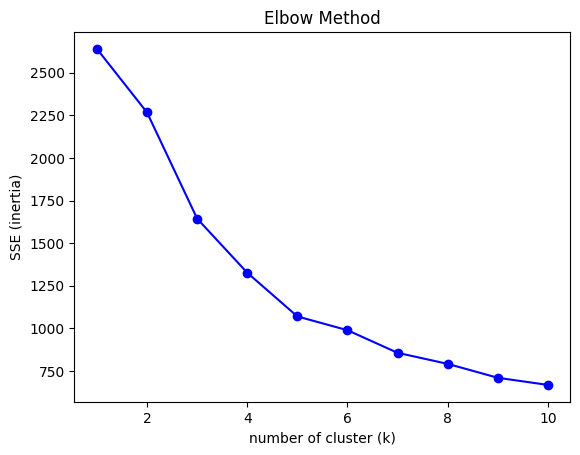

average silhouette score:  0.4582633767207058


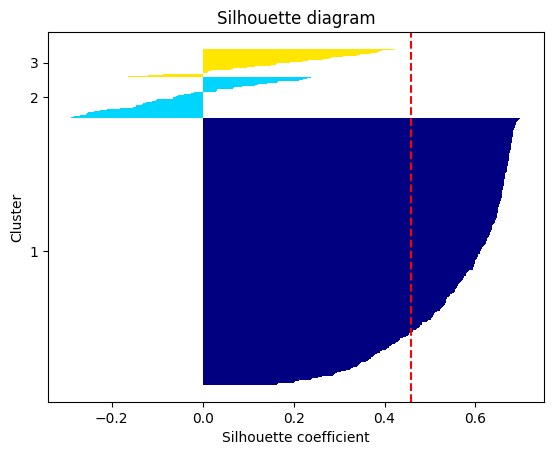

In [11]:
# PROBLEMA 10 - SELECCION DEL NRO DE K CLUSTERS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.manifold import TSNE

# loading and inspect data
#from google.colab import files
#uploaded = files.upload()

data = pd.read_csv('Wholesale customers data.csv')
print(data.head())
print(data.info())

# Drop region & channel for clustering (monetary only)
X = data.drop(['Region', 'Channel'], axis = 1)

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# using PCA to visualizate
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

# plotting explained variance
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print("cumulative explained variance:", cum_var_exp)

plt.bar(range(1, 3), var_exp, alpha = 0.5, align = 'center', label = 'individual explained variance')
plt.step(range(1, 3), cum_var_exp, where = 'mid', label = 'cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('PCA explained variance')
plt.legend(loc = 'best')
plt.grid()
plt.show()

# using elbow metod for k
sse = []
k_range = range(1, 11)

for k in k_range:
  kmeans = KMeans(n_clusters =k, random_state=42)
  kmeans.fit(X_scaled)
  sse.append(kmeans.inertia_)

plt.plot(k_range, sse, 'bo-')
plt.xlabel('number of cluster (k)')
plt.ylabel('SSE (inertia)')
plt.title('Elbow Method')
plt.show()

# silohouette analisis for k
k = 3
kmeans = KMeans(n_clusters = k, random_state=42)
labels = kmeans.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, labels)
print("average silhouette score: ", silhouette_avg)

# silhouette diagram
sil_vals = silhouette_samples(X_scaled, labels)
from matplotlib import cm

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i in range(k):
    c_silhouette_vals = sil_vals[labels == i]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / k)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor="none", color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, [str(i+1) for i in range(k)])
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient")
plt.title("Silhouette diagram")
plt.show()

In [14]:
# PROBLEMA 11 - COMPARACION CON GRUPOS CONOCIDOS
# attaching clusters labels to original data
data['Cluster'] =labels

# comparing clusters with Region and Channel
print("\n comparison with Region")
print(pd.crosstab(data['Region'], data['Cluster']))

print("\n comparison with Channel")
print(pd.crosstab(data['Channel'], data['Cluster']))


 comparison with Region
Cluster    0   1   2
Region              
1         63   7   7
2         37   2   8
3        250  44  22

 comparison with Channel
Cluster    0   1   2
Channel             
1        251  47   0
2         99   6  37


In [15]:
# PROBLEMA 12 - INFROMACION UTIL PARA WHOLESALERS (resumen estadistiico de clusters)
summary = data.groupby('Cluster').mean()
print("\ncluster summary stats:")
print(summary)



cluster summary stats:
          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.282857  2.534286   8935.500000   4228.528571   5848.034286   
1        1.113208  2.698113  34540.113208   5860.358491   6122.622642   
2        2.000000  2.405405   8704.864865  20534.405405  30466.243243   

              Frozen  Detergents_Paper   Delicassen  
Cluster                                              
0        2167.231429       1913.605714  1102.120000  
1        9841.735849        981.471698  3664.245283  
2        1932.621622      14758.837838  2459.351351  


In [ ]:
# PROBLEMA 13 - INVETIGAR EN OTROS METODOS (DBSCAN, t-SNE, LLE)

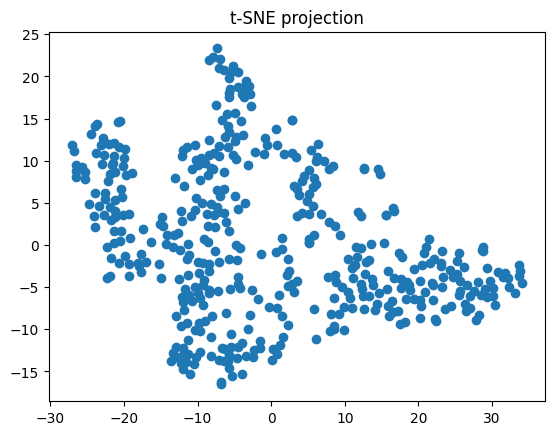

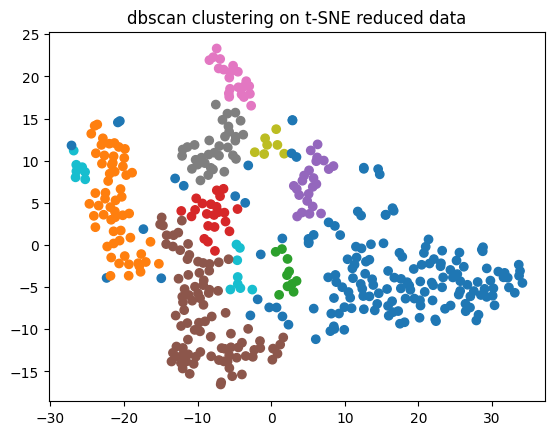

Text(0.5, 1.0, 'DBSCAN + t-SNE clustering')

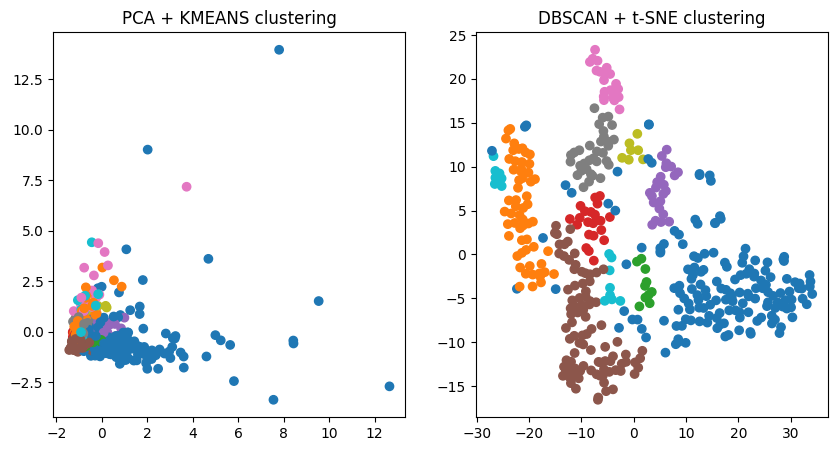

In [17]:
# PROBLEMA 14 - UTILIZANDO t-SNE Y DBSCAN
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# applying t-sne for 2d embedding
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title("t-SNE projection")
plt.show()

# using DBSCAN on t-SNE reduced data
dbscan = DBSCAN(eps=2, min_samples=5)
db_labels = dbscan.fit_predict(X_tsne)

# plotting DBSCAN clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=db_labels, cmap='tab10')
plt.title("dbscan clustering on t-SNE reduced data")
plt.show()

# comparing with original PCA+Kmeans
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10')
plt.title("PCA + KMEANS clustering")

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=db_labels, cmap='tab10')
plt.title("DBSCAN + t-SNE clustering")